Hello Lab 9 World!


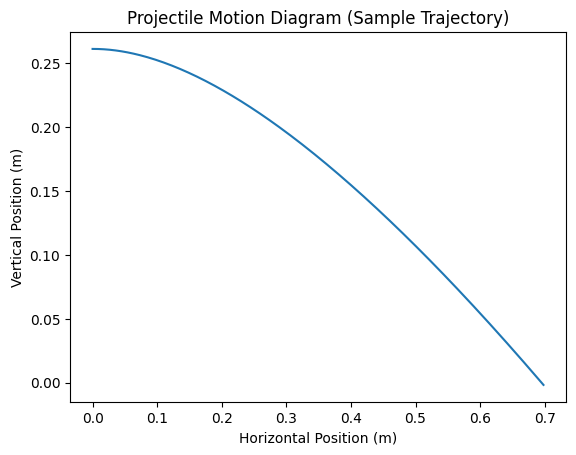

Nominal final horizontal position: 0.70 m
Mean final horizontal position: 0.72 m
Standard deviation of final horizontal position: 0.02 m


In [15]:
import numpy as np

from matplotlib import pyplot as plt

plt.close('all')


#Drag constents
c_Sphere = 0.48 #Drag coeffecent of a sphere. 0.48 or 0.49 +- 0.01
#Air density in rexburg
ρ = 0.99 #0.99 mg/cm^3
δρ = 0.03 #0.03 mg/cm^3
# Constants
g = 9.80
π = np.pi
m = 0.222 #Grams
r = 0.01
c = (1/2) * ρ * (π * r**2) * 0.48


# Nominal launch parameters
v0_nominal = 1.6  # m/s
theta_nominal = 45 * π / 180  # radians
y0_nominal = 0.273  # meters

# Uncertainty parameters (standard deviations)
v0_uncertainty = 0.038  # m/s
theta_uncertainty = 0.5 * π / 180  # radians
y0_uncertainty = 0.01  # meters

# Simulation parameters
num_simulations = 1000
dt = 0.001

#calculate Drag
vx = v0_nominal
vy = -g + c
D = c * (np.sqrt((vx**2) + (vy**2))) * vx

# Arrays to store the results
final_x = []

print('Hello Lab 9 World!')

for _ in range(num_simulations):
    # Generate random values with uncertainties
    v0 = np.random.normal(v0_nominal, v0_uncertainty)
    theta = np.random.normal(theta_nominal, theta_uncertainty)
    y0 = np.random.normal(y0_nominal, y0_uncertainty)
    
    # Calculate initial velocity components
    #vx = v0 * np.cos(theta)
    vy = -g * c
    vx = .222 * g + D
    # Initialize lists for positions and time
    x = [0.0]
    y = [y0]
    t = [0.0]
    
    # Loop to compute the projectile's trajectory
    while y[-1] > 0:
        ax = v0_nominal/m
        ay = -g + c
        x.append(x[-1] + vx * dt)
        vx = vx + ax * dt
        y.append(y[-1] + vy * dt)
        vy += ay * dt
        t.append(t[-1] + dt)
    
    # Store the final horizontal position
    final_x.append(x[-1])

# Calculate mean and standard deviation of the results
mean_x = np.mean(final_x)
std_x = np.std(final_x)

# Plot a sample trajectory (optional)
plt.plot(x, y)
plt.title('Projectile Motion Diagram (Sample Trajectory)')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.show()

# Output the statistics
print(f"Nominal final horizontal position: {x[-1]:.2f} m")
print(f"Mean final horizontal position: {mean_x:.2f} m")
print(f"Standard deviation of final horizontal position: {std_x:.2f} m")
